In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


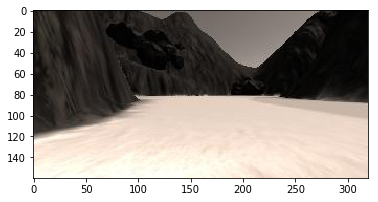

In [2]:
filename = 'sample.jpg'
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

In [3]:
import numpy as np

In [4]:
print(image.dtype, image.shape, np.min(image),np.max(image)) # image.dtype = bit unsigned integer array, image.shape = size of array(a,b,c), a = number of pixels in the y direction, b = number of pixels in the x direction, and c = number of layers or color channels.
# np.min() = minimum value in the array(picture), maximum value in the array.

uint8 (160, 320, 3) 0 255


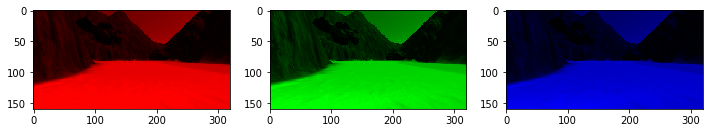

In [5]:
# it is better to do np.copy() than to assign '=', because when you assign('='), two arrays equal to each other will be created and a change in one will lead to a change in the other.
# we want to display the image in the three primary colors RED,GREEN, AND BLUE(RGB)
# just know that 0 == red,1 == green, and 2 == blue 
red_channel = np.copy(image)
red_channel[:,:,[1,2]] = 0 # making green and blue = zero
green_channel = np.copy(image)
green_channel[:,:,[0,2]] = 0 # making red and blue = zero
blue_channel = np.copy(image)
blue_channel[:,:,[0,1]] = 0 # making red and green = zero

fig = plt.figure(figsize=(12,3)) # creates figure for plotting
plt.subplot(131) # initializing subplot number 1 with 3 columns 1 row
plt.imshow(red_channel)# plot red channel
plt.subplot(132) # initializing subplot number 2 with 3 columns 1 row 
plt.imshow(green_channel) # plot green channel
plt.subplot(133) # initializing  subplot number 3 with 3 columns 1 row
plt.imshow(blue_channel)# plot blue channel
plt.show()


In [6]:
def color_thresh(img, rgb_thresh = (160,160,160)):
    color_select = np.zeros_like(img[:,:,0])
    
    above_thresh = (img[:,:,0]>rgb_thresh[0]) & (img[:,:,1]>rgb_thresh[1]) & (img[:,:,2]>rgb_thresh[2])
    color_select[above_thresh] = 1
    
    return color_select



In [7]:
modified_image = color_thresh(image)

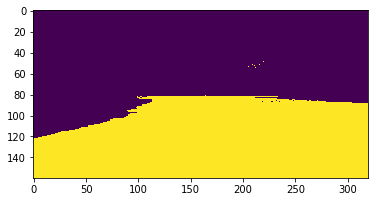

In [8]:
plt.imshow(modified_image)
plt.show()

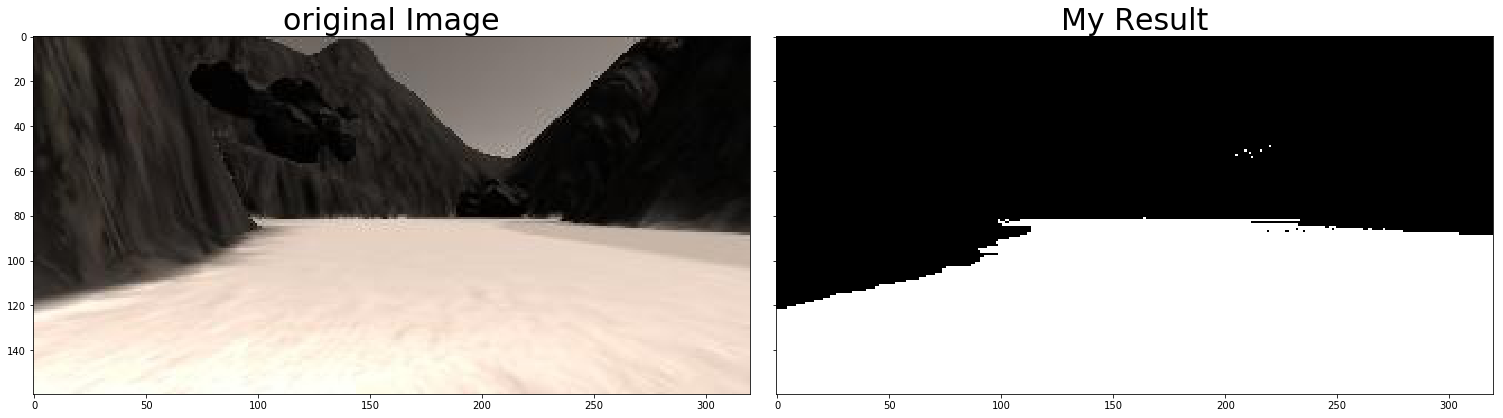

In [9]:
# Displaying the original image and the binary image
f, (ax1,ax2) = plt.subplots(1,2, figsize=(21,7), sharey = True) # sharey means the two plots will share the y-axis, for more info -> 'https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html'
f.tight_layout()
ax1.imshow(image)
ax1.set_title('original Image', fontsize = 30)

ax2.imshow(modified_image, cmap='gray')
ax2.set_title('My Result', fontsize = 30)
#plt.subplots_adjust(left = 0., right = 1, top = 0.9, bottom = 0.)
plt.show()

In [10]:
# Example to understand color threshold.
array = [.06, .25, 0, .15, .5, 0, 0, 0.04, 0, 0]
highCountX = 3
lowValY = .1
array_np = np.asarray(array)
low_values_flags = array_np<lowValY
print(low_values_flags)

[ True False  True False False  True  True  True  True  True]


In [11]:
array_np[low_values_flags] = 0
print(array_np)

[0.   0.25 0.   0.15 0.5  0.   0.   0.   0.   0.  ]
